In [ ]:
import pandas as pd
import numpy as np
# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# import xgboost as xgb

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: Click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.8.3
    Uninstalling tensorflow-datasets-4.8.3:
      Successfully uninstalled tensorflow-datasets-4.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


89078/89078 [==============================] - 0s 0us/step


In [ ]:
train_data=pd.read_csv('/content/imdb_urdu_reviews_test.csv')
test_data=pd.read_csv('/content/imdb_urdu_reviews_train.csv')

In [ ]:
train_data.head()

test_data.head()

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive


In [ ]:
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)

(50000, 2)


In [ ]:
df =  data.copy()
df

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,negative
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,negative
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,negative
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,positive
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,positive
...,...,...
49995,اگرچہ میں نے سب سے زیادہ تکنیکی طور پر اعلی در...,positive
49996,اس فلم نے مجھے حیرت سے دوچار کردیا۔ میں اسے عا...,positive
49997,مجھے افسوس ہے ، لیکن یہاں تک کہ ٹی جے ہوکر کے ...,negative
49998,اس فلم کو اکیڈمی کے ایوارڈ کے لئے نہیں سمجھا ج...,positive


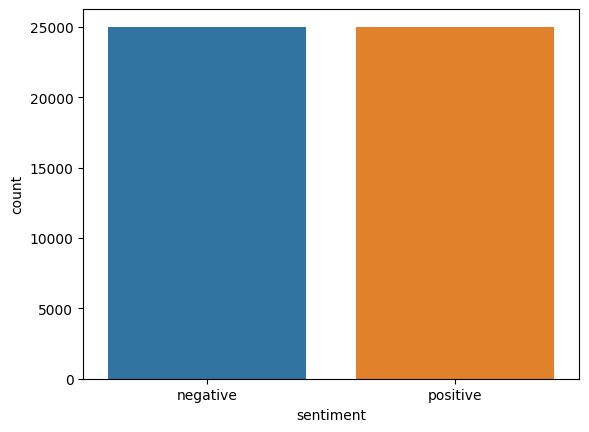

In [ ]:
sns.countplot( x = 'sentiment', data = df );

In [ ]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [ ]:
df['review'] = df['review'].apply(normalize)

In [ ]:
df['review'] = df['review'].apply(remove_accents)

In [ ]:
df['review'] = df['review'].apply(replace_urls)

In [ ]:
df['review'] = df['review'].apply(replace_emails)

In [ ]:
df['review'] = df['review'].apply(replace_currency_symbols)

In [ ]:
df['review'] = df['review'].apply(normalize_whitespace)

In [ ]:
# Remove stop words from text
from typing import FrozenSet

In [ ]:
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [ ]:
len(STOP_WORDS)

430

In [ ]:
df[['review']].head(10)

,review
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...
5,میں نے دو وجوہات کی بنا پر یہ ڈی وی ڈی کرایہ پ...
6,انگمار برگ مین کی اسکمین دیکھنے کے بعد ، مجھے ...
7,خوفناک نفسیاتی تھرلر جس کو دیکھنے کے لئے تقریب...
8,مجھے اسٹیون سیگل پسند ہے لیکن میرے پاس کوئی فل...
9,یہ کارنی کی لامتناہی لائن میں شامل ہوجاتا ہے ،...


In [ ]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "

    return lemme_str

In [ ]:
df['review'] =  df['review'].apply(remove_stopwords)

In [ ]:
df['lemmatized_text'] = df['review'].apply(lemitizeStr)

In [ ]:
df['review'][2], df['lemmatized_text'][2]

('عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ تلاش وقت ، مہلک جبلت کاپی آیا۔ فلم کلیکٹر ناطے سائنس فائی ، ہارر غیر ملکی راکشسوں خاصیت ، خریدنے فیصلہ (اس حقیقت ذکر پانچ ڈالر لاگت - سودا ، یقین کریں)۔ دیکھنے ، رائے دیکھا خاص بات ہے۔ انٹرنیٹ تحقیق ، دریافت فلم دراصل بریڈرز کہلاتی ٹم کنکیڈ ہارر فلک ریمیک 1980 دہائی وسط ویڈیو اسٹوروں تیز کیا۔ دیکھ چکا ہوں۔ دریافت "مہلک جبلت" تعریف اضافہ ہوا۔ پرائیوٹ گرلز کالج لان الکا دہل گر تباہ ہوگئی۔ واحد استاد ایشلے (ٹوڈ جینسن ادا کیا۔ ٹھیک ، لڑکا چار سال کلٹ فلک سائبرگ COP سائبرگ تبدیل ہے) ، نوٹس طلباء غائب ، سیاہ فام واقعے سامنا پڑا۔ داغدار چہرے بالوں عورت چمڑے لباس پہنے ہوئے۔ تفتیش پتہ چلتا اجنبی مخلوق الکا سواری مقامی خواتین نسل استعمال نسل پیدا زمین تھی۔ مقامی جاسوس انھیں گمشدگیوں ذمہ دار مانتا ، ایشلے عفریت روکنے کوشش ہے۔ ٹم کنکیڈ (جو جنس پرستوں فحش بنانے صنف چھوڑ گا) ہدایتکاری تیار کردہ اصل بریڈرز ، سائنس فائی / ہارر فلم دراصل پتلی پردہ دار نرم کور فحش فلم شائقین شائقین جلد ل. تیار تھا۔ خیال ، 1980 دہائی بنی بدترین فلموں ہے۔ ریمیک چاہتا معمہ ہے۔

In [ ]:
df[['review', 'lemmatized_text']].head(10)

,review,lemmatized_text
0,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...
1,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...
2,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...
3,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...
4,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...
5,وجوہات ڈی وی ڈی کرایہ لی۔ عظیم اداکاروں ، ہدای...,وجوہات ڈی وی ڈی کرایہ لی۔ عظیم اداکاروں ، ہدای...
6,انگمار برگ مین اسکمین دیکھنے ، احساسات ، اہم ب...,انگمار برگ مین اسکمین دیکھنے ، احساسات ، اہم ب...
7,خوفناک نفسیاتی تھرلر دیکھنے تقریبا painful تکل...,خوفناک نفسیاتی تھرلر دیکھنے تقریبا painful تکل...
8,اسٹیون سیگل پسند فلمی فلم ہے۔ فلموں آسانی کھو ...,اسٹیون سیگل پسند فلمی فلم ہے۔ فلموں آسانی کھو ...
9,کارنی لامتناہی لائن شامل ہوجاتا ، 50 سائنس فائ...,کارنی لامتناہی لائن شامل ہوجاتا ، 50 سائنس فائ...


In [ ]:
df.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...,negative,0,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...
1,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...,negative,0,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...
2,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...,negative,0,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...
3,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...,positive,1,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...
4,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...,positive,1,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.3, random_state = 7)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (35000,)
Shape of X_test (15000,)
Shape of Y_train (35000,)
Shape of Y_test (15000,)


In [ ]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
 #check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((35000, 50000), (15000, 50000))

In [ ]:
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100)
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    print(accuracy_score(test_predictionSVM, Y_test))
    return classification_report(test_predictionSVM, Y_test), confusion_matrix(test_predictionSVM, Y_test)

In [ ]:
def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)
    return classification_report(test_predictionLR, Y_test) , confusion_matrix(test_predictionLR, Y_test)

In [ ]:
def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    DT = DecisionTreeClassifier(max_depth = 9, random_state = 23 )
    DT.fit(train_vecs, Y_train)

    # Testing
    test_predictionDT = DT.predict(test_vecs)
    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test)

In [ ]:
def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    return classification_report(test_predictionRF, Y_test), confusion_matrix(test_predictionRF, Y_test)


In [ ]:
from sklearn.metrics import accuracy_score
class_report , conf_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of SVM CLASSIFIER on TF-IDF Vectorizer\n')
print(class_report)

print(conf_matrix)
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
# f1 = f1_score(train_vecs, test_vecs)

# print the F1 score
# print("F1 score: ", f1)
# # Define the true labels and predicted labels
# y_pred = train_vecs
# y_true = test_vecs

# # Create the confusion matrix
# cm = confusion_matrix(y_true, y_pred)

# # Define the class names
# class_names = ['Class 0', 'Class 1']

# # Create the heatmap
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# # Add labels to the plot
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()



0.865
Results of SVM CLASSIFIER on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7469
           1       0.87      0.86      0.87      7531

    accuracy                           0.86     15000
   macro avg       0.86      0.87      0.86     15000
weighted avg       0.87      0.86      0.87     15000

[[6472  997]
 [1028 6503]]


In [ ]:
from sklearn.metrics import accuracy_score
class_report , conf_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Logistic Regression Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)


Results of Logistic Regression Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7331
           1       0.88      0.86      0.87      7669

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

[[6438  893]
 [1062 6607]]


In [ ]:
from sklearn.metrics import accuracy_score
class_report , conf_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Decision Tree Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)
print(accuracy_score)


Results of Decision Tree Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.57      0.80      0.67      5338
           1       0.86      0.67      0.75      9662

    accuracy                           0.71     15000
   macro avg       0.71      0.73      0.71     15000
weighted avg       0.76      0.71      0.72     15000

[[4276 1062]
 [3224 6438]]
<function accuracy_score at 0x7f9c5ca35900>


In [ ]:
from sklearn.metrics import accuracy_score
class_report , conf_matrix = RF_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Random Forest Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)


Results of Random Forest Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      6971
           1       0.86      0.81      0.84      8029

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000

[[5942 1029]
 [1528 6501]]


In [ ]:
df_w2v = df.copy()

In [ ]:
df_w2v.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...,negative,0,بے گھر خواتین دستاویزی فلم ہے۔ لحاظ دلچسپ بات ...
1,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...,negative,0,اچھ ،ی کام ، پوری فلم گرڈج بے ترتیب ہلاک تھی۔ ...
2,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...,negative,0,عجیب بات حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسکاؤنٹ ت...
3,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...,positive,1,خاص وکیلوں پولیس اہلکاروں ہے۔ پورٹو ریکو ، چھو...
4,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...,positive,1,، وضاحت: سرخی ، فلم 8 اسٹارز مجموعی بہترین فلم...


import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["lemmatized_text"].apply(tokenizer)

In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Load the dataset and split into features and target
# X, y = load_dataset()

# Define the classifiers to use
clf1 = RandomForestClassifier()
clf2 = SVC()
clf3 = GaussianNB()

# Compute the accuracy scores for each classifier using cross-validation
scores1 = cross_val_score(clf1, train_vecs, Y_train, cv=5, scoring='accuracy')
scores2 = cross_val_score(clf2, train_vecs, Y_train, cv=5, scoring='accuracy')
# scores3 = cross_val_score(clf3, X, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy scores
mean_scores = [np.mean(scores1), np.mean(scores2)]
std_scores = [np.std(scores1), np.std(scores2)]

# Print the mean and standard deviation of the accuracy scores for each classifier
print("Random Forest Classifier: Mean accuracy = %.2f%%, Std deviation = %.2f%%" % (mean_scores[0]*100, std_scores[0]*100))
print("Support Vector Machine: Mean accuracy = %.2f%%, Std deviation = %.2f%%" % (mean_scores[1]*100, std_scores[1]*100))
# print("Gaussian Naive Bayes: Mean accuracy = %.2f%%, Std deviation = %.2f%%" % (mean_scores[2]*100, std_scores[2]*100))


Random Forest Classifier: Mean accuracy = 82.76%, Std deviation = 0.15%
Support Vector Machine: Mean accuracy = 87.07%, Std deviation = 0.34%


In [ ]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["lemmatized_text"].apply(tokenizer)

In [ ]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"],  window=5, workers=10, min_count = 1)

In [ ]:
model_word2vec.wv.most_similar("مرد")

[('مردوں', 0.7711800932884216),
 ('خواتین', 0.7403430342674255),
 ('سیسہ', 0.7076859474182129),
 ('عورتیں', 0.6960232853889465),
 ('عورتوں', 0.6934417486190796),
 ('مردانہ', 0.689089834690094),
 ('گورے', 0.6253144145011902),
 ('عورت', 0.585841953754425),
 ('بوڑھی', 0.5799151062965393),
 ('جوڑے', 0.5794765949249268)]

In [ ]:
import pydantic.utils; print(pydantic.utils.version_info())

             pydantic version: 1.10.7
            pydantic compiled: True
                 install path: /usr/local/lib/python3.10/dist-packages/pydantic
               python version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
                     platform: Linux-5.10.147+-x86_64-with-glibc2.31
     optional deps. installed: ['typing-extensions']


In [ ]:
model_word2vec.wv.most_similar("خوفناک")

[('بھیانک', 0.7935066223144531),
 ('خراب', 0.766434371471405),
 ('ہولناک', 0.7475847601890564),
 ('ناقص', 0.6961855888366699),
 ('ناگوار', 0.6665489077568054),
 ('شوقیہ', 0.6637290120124817),
 ('افسوسناک', 0.6536387205123901),
 ('پریشان', 0.644120454788208),
 ('بدتر', 0.6389462351799011),
 ('بیکار', 0.6280716061592102)]

In [ ]:
model_word2vec.wv.most_similar("فلم")

[('مووی', 0.7860820889472961),
 ('چیز', 0.7293021082878113),
 ('فلموں', 0.7249658703804016),
 ('ایمانداری', 0.6125369668006897),
 ('دراصل', 0.6035624146461487),
 ('فلمیں', 0.5920913815498352),
 ('۔', 0.5738440155982971),
 ('اصلیت', 0.5731116533279419),
 ('بہرحال', 0.5685332417488098),
 ('کہانی', 0.5597538352012634)]

In [ ]:
model_word2vec.wv.most_similar("کارٹون")

[('کارٹونوں', 0.6850836873054504),
 ('شوز', 0.6667147874832153),
 ('شو', 0.6405481696128845),
 ('ڈزنی', 0.5851524472236633),
 ('ٹیلیویژن', 0.5484300851821899),
 ('سیریز', 0.5373712182044983),
 ('گرافکس', 0.5204309821128845),
 ('لطیفے', 0.5055188536643982),
 ('انیمیشن', 0.5037941336631775),
 ('اقساط', 0.49883612990379333)]

In [ ]:
VOCAB_SIZE = len(model_word2vec.wv.index_to_key)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df_w2v["tokens"]])

In [ ]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df_w2v["tokens"])
encoded = token.texts_to_sequences(df_w2v["tokens"])

In [ ]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

Streaming output truncated to the last 5000 lines.
113023 پونسیٹ
113024 لیویونگ
113025 کیریکیٹی
113026 ڈیلکروکس
113027 پیلز
113028 پیٹریو
113029 بھنسانی
113030 جتوانا
113031 gettingا
113032 پکاررہا
113033 17.75
113034 اپوکلائسی
113035 اپلوسی
113036 آوفل
113037 بیلیل
113038 گدھارا۔بعض
113039 گھڈرا
113040 ایکانکٹمنٹ
113041 گدازدہ
113042 میتری
113043 .لیف
113044 ریگڈ
113045 فوئیر
113046 cossack
113047 افزائیوں
113048 سونورورس
113049 flack
113050 پریشرائزڈ
113051 جدوجہدیں
113052 اسائن
113053 باربیوئٹ
113054 کٹیٹونیا
113055 گدے
113056 اوبیری
113057 کٹیلر
113058 سوجاتی
113059 وات
113060 کھرجاتا
113061 شیزوفیریا
113062 انڈرٹینڈ
113063 اچھograpے
113064 میتھیوmanن
113065 الٹائی
113066 عاصمالی
113067 ​​ایسا
113068 کلروزر
113069 کالف
113070 گوموراہ
113071 باتگور
113072 oar
113073 ٹوسٹرز
113074 باجلز
113075 سلائسین
113076 اسکارففیس
113077 himmelen
113078 برلنئٹ
113079 انگلز
113080 اسٹاسی
113081 گاؤلیس
113082 مستروانی
113083 لڑسکتی
113084 کپکپاتے
113085 flea
113086 mutt
113087 پیکیکس
113088 سپرین
1

In [ ]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [ ]:
train_label = df_w2v.encoded_sentiments

In [ ]:
type(train_label[0])

numpy.int64

In [ ]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [ ]:
train_sentences

array([[    4,   636,   408, ...,     0,     0,     0],
       [   15, 48451,    15, ...,     0,     0,     0],
       [   16,  6264,   214, ...,     0,     0,     0],
       ...,
       [  109,     2,  1118, ...,     0,     0,     0],
       [  203,     4,   435, ...,     0,     0,     0],
       [   60,    24,   415, ...,     0,     0,     0]])

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

In [ ]:
model = Models.Sequential()

model.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                           embeddings_initializer = Init.Constant(words2vec_matrix),
                           input_length=MAX_LEN, trainable=False ))

model.add(Layers.Conv1D(512, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(256, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(128, 5, activation="relu"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(64, 3, activation="relu"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(32, 3, activation="relu"))
model.add(Layers.Dropout(0.3))

model.add(Layers.Flatten())

model.add(Layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Layers.Dropout(0.6))

model.add(Layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1769, 128)         15331584  
                                                                 
 conv1d (Conv1D)             (None, 1765, 512)         328192    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 353, 512)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 349, 256)          655616    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 69, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 65, 128)           1

In [ ]:
CONV_NET = model.fit( train_sentences, train_tags, epochs=5, validation_split=0.20 )

Epoch 1/5
1000/1000 [==============================] - 3132s 3s/step - loss: 0.6935 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 2/5
 410/1000 [===========>..................] - ETA: 28:08 - loss: 0.6932 - accuracy: 0.4979

KeyboardInterrupt: ignored

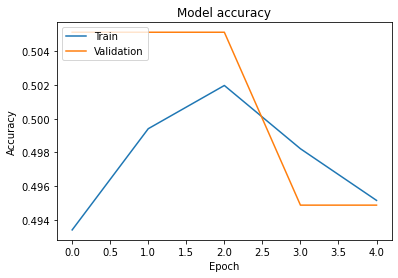

In [ ]:
plt.plot(CONV_NET.history['accuracy'])
plt.plot(CONV_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

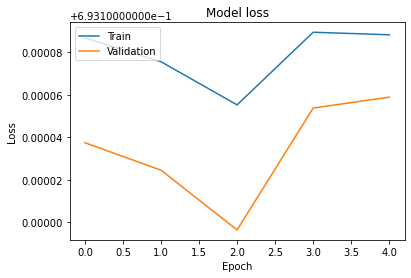

In [ ]:
plt.plot(CONV_NET.history['loss'])
plt.plot(CONV_NET.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(model.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.50      0.67     10000

    accuracy                           0.50     10000
   macro avg       0.50      0.25      0.34     10000
weighted avg       1.00      0.50      0.67     10000



C:\Users\MicroScan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MicroScan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MicroScan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lstm = Models.Sequential()

lstm.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                          embeddings_initializer = Init.Constant(words2vec_matrix),
                          input_length=MAX_LEN, trainable=False ))

lstm.add(Layers.Bidirectional(Layers.LSTM(256, activation='tanh')))

lstm.add(Layers.Dense(128, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(64, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(1, activation='sigmoid'))

lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1769, 128)         15331584  
                                                                 
 bidirectional (Bidirectiona  (None, 512)              788480    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3)
LSTM_NET = lstm.fit(train_sentences, train_tags, epochs=2, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/2
 239/1000 [======>.......................] - ETA: 19:04:45 - loss: 0.6957 - accuracy: 0.4946